# Twitter US Airline Sentiment

Analyze how travelers in February 2015 expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Loading Dataset

In [156]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [157]:
airlines_df = pd.read_csv("airlines.csv", 
                          encoding='iso-8859-1')

In [158]:
airlines_df.head(2)

,tweet_id,airline_sentiment,text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,5.70E+17,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.70E+17,negative,"@VirginAmerica it's really aggressive to blast obnoxious entertainment"" in your guests' faces &amp; they have little recourse""""VirginAmerica it's really aggressive to blast obnoxious ""entertainme""""irginAmeric""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
pd.set_option("max_colwidth", 400)

In [100]:
airlines_df = airlines_df[['airline_sentiment', 'text']]

In [101]:
airlines_df

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
1,negative,"@VirginAmerica it's really aggressive to blast obnoxious entertainment"" in your guests' faces &amp; they have little recourse""""VirginAmerica it's really aggressive to blast obnoxious ""entertainme""""irginAmeric"""
2,negative,@VirginAmerica and it's a really big bad thing about it
3,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\rit's really the only bad thing about flying VA
4,positive,"@VirginAmerica yes, nearly every time I fly VX this Ì¢âÂÒear wormÌ¢âÂå wonÌ¢âÂã¢t go away :)"
...,...,...
11592,negative,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday."
11593,negative,@AmericanAir right on cue with the delaysÌ¡üÛ÷Õ
11594,positive,@AmericanAir thank you we got on a different flight to Chicago.
11595,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc


## Clean Records

- Remove wrong labels
- Remove punctuations

In [159]:
airlines_df = (airlines_df[
    airlines_df.airline_sentiment.isin(['positive', 
                                        'negative'])])

In [160]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [104]:
def clean_text(text):
    text_lower = text.lower()
    new_text = (" ".join( w for w in tokenizer.tokenize(text_lower) if w.isalpha()))
    
    return new_text

In [105]:
clean_text("@VirginAmerica plus you've added commercials")

'virginamerica plus you ve added commercials'

In [115]:
airlines_df['text_new'] = (airlines_df['text']
                           .map( lambda x: clean_text(str(x))))

In [116]:
airlines_df['sentiment'] = (airlines_df['airline_sentiment']
                            .map(lambda x: int(x == 'positive')))

In [117]:
airlines_df[['text_new', 'sentiment']]

,text_new,sentiment
0,virginamerica plus you ve added commercials to the experience tacky,1
1,virginamerica it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse virginamerica it s really aggressive to blast obnoxious entertainme irginameric,0
2,virginamerica and it s a really big bad thing about it,0
3,virginamerica seriously would pay a flight for seats that didn t have this playing it s really the only bad thing about flying va,0
4,virginamerica yes nearly every time i fly vx this ì ââ òear wormì ââå wonì ââ ã t go away,1
...,...,...
11592,americanair my flight was cancelled flightled leaving tomorrow morning auto rebooked for a tuesday night flight but need to arrive monday,0
11593,americanair right on cue with the delaysì ü û õ,0
11594,americanair thank you we got on a different flight to chicago,1
11595,americanair leaving over minutes late flight no warnings or communication until we were minutes late flight that s called shitty customer svc,0


## Check label distribution

In [118]:
airlines_df.sentiment.value_counts(normalize=True)

0    0.795108
1    0.204892
Name: sentiment, dtype: float64

## Split Dataset

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
train_set, test_set = train_test_split(airlines_df,
                                   train_size = 0.8,
                                   random_state = 80)

## Creating balanced dataset

In [121]:
airlines_pos = train_set[train_set.sentiment == 1]
airlines_neg = train_set[train_set.sentiment == 0]

In [122]:
airlines_pos.shape

(1865, 4)

In [123]:
airlines_neg.shape

(7357, 4)

## Oversample

In [124]:
from sklearn.utils import resample, shuffle

In [125]:
airlines_pos_resmpled = resample(airlines_pos,
                                 replace=True,
                                 n_samples=7000)

In [126]:
new_airlines_df = pd.concat([airlines_pos_resmpled, airlines_neg])

In [127]:
new_airlines_df.shape

(14357, 4)

In [128]:
new_airlines_df.sentiment.value_counts()

0    7357
1    7000
Name: sentiment, dtype: int64

In [129]:
new_airlines_df = shuffle(new_airlines_df)

## Create Vectorizer

In [130]:
from sklearn.feature_extraction import text

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(stop_words = text.ENGLISH_STOP_WORDS,
                            min_df = 5,
                            max_df = 0.8)
tfidf_vec.fit(new_airlines_df.text_new)

TfidfVectorizer(max_df=0.8, min_df=5,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [132]:
train_ds = tfidf_vec.transform(new_airlines_df.text_new)

In [133]:
train_ds.shape

(14357, 2937)

In [134]:
feature_names = tfidf_vec.get_feature_names_out()

In [135]:
train_ds_df = pd.DataFrame(train_ds.todense())
train_ds_df.columns = feature_names

## Build Model

In [136]:
from sklearn.naive_bayes import BernoulliNB

In [137]:
nb = BernoulliNB()

In [ ]:
nb.fit(train_ds, new_airlines_df.sentiment)

## Predict on test set and check accuracy

In [ ]:
test_ds = tfidf_vec.transform(test_set.text_new)

In [148]:
y_pred = nb.predict(test_ds)

In [149]:
from sklearn.metrics import confusion_matrix, classification_report

In [150]:
cm_v1 = confusion_matrix(test_set.sentiment, y_pred, labels = [1,0])

In [151]:
import seaborn as sn
import matplotlib.pyplot as plt

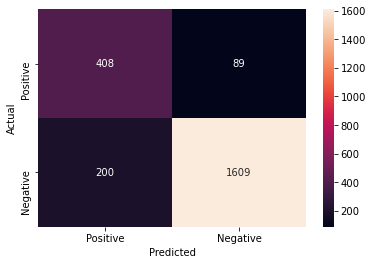

In [152]:
sn.heatmap(cm_v1,
           fmt='.0f',
           annot = True,
           xticklabels = ['Positive', 'Negative'],
           yticklabels = ['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [153]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(test_set.sentiment, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1809
           1       0.67      0.82      0.74       497

    accuracy                           0.87      2306
   macro avg       0.81      0.86      0.83      2306
weighted avg       0.89      0.87      0.88      2306

